# CASE 1: sub_tint = None, meas_noise = 0%, matrix_noise = 1%

single_difference_matrix  [[ 1.01109326e+00  2.42616658e-03  2.00744530e-02  5.96189957e-03]
 [ 9.22277847e-04 -9.49746585e-01  1.57905301e-01  4.34661099e-02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]]
single_sum_matrix  [[ 1.01109326e+00  2.42616658e-03  2.00744530e-02  5.96189957e-03]
 [ 9.22277847e-04 -9.49746585e-01  1.57905301e-01  4.34661099e-02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]]
single_difference_matrix  [[ 1.01108399  0.00155379 -0.01968297 -0.00602096]
 [ 0.00468932  0.94811101 -0.14033874 -0.1003417 ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
single_sum_matrix  [[ 1.01108399  0.00155379 -0.01968297 -0.00602096]
 [ 0.00468932  0.94811101 -0.14033874 -0.1003417 ]
 [ 0.          0.          0.          0.        ]
 [ 0.         

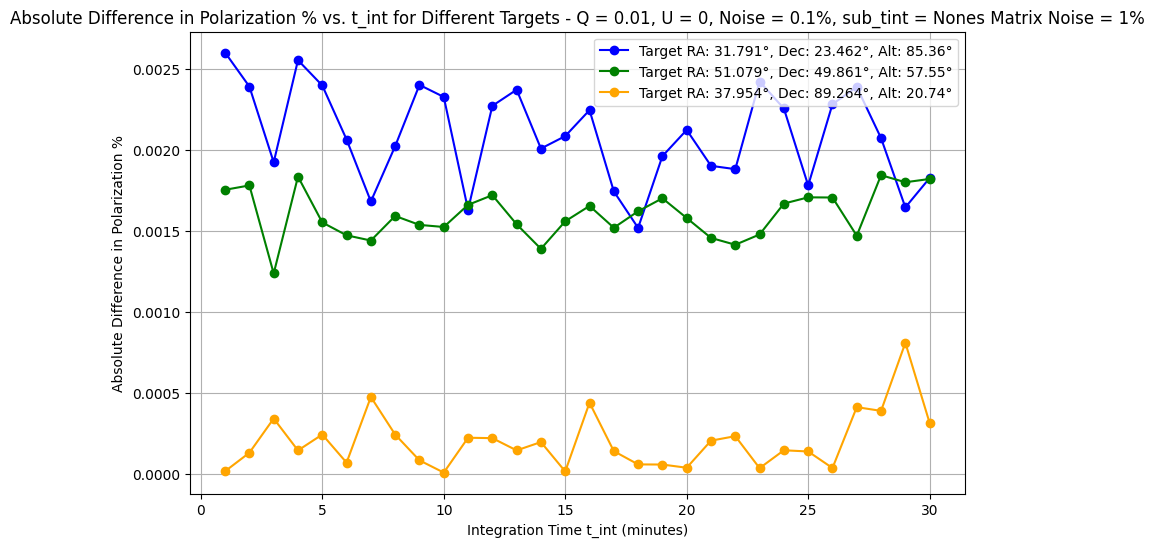

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, '../python/')
import angles
import instrument_mm
import stokes

# Define observer parameters
observer_latitude = 20.0  # Latitude of Mauna Kea in degrees
observer_longitude = -155.5  # Longitude of Mauna Kea in degrees

# Define target parameters
targets = [
    {"ra": 31.791, "dec": 23.462},  # Hamal (Alpha Arietis)
    {"ra": 51.079, "dec": 49.861},  # Mirfak (Alpha Persei)
    {"ra": 37.954, "dec": 89.264},  # Polaris (Alpha Ursae Minoris)
]

# Observation date and time
observation_date = "2460614.91667"  # JD for 10/31/2024
observation_time = "10:00:00"   # UT time to get peak at midnight HST

# Time intervals in seconds (1 to 10 minutes in 1-minute increments)
sub_tint = None # given in seconds
time_intervals = np.arange(1, 31) * 60  # Convert minutes to seconds
Q_injected = 0.01  # Example injected polarization level in Stokes Q
U_injected = 0
noise_percentage = 0.1
TMT_matrix_noise = 1
NFIRAOS_matrix_noise = 1
MODHIS_matrix_noise = 1
observable = "single_difference"

# Colors for each target
colors = ['blue', 'green', 'orange']

# Plot data storage
polarization_differences = {i: [] for i in range(len(targets))}

# Run the simulation for each target and each time interval
for target_idx, target in enumerate(targets):
    injected_polarization = np.sqrt(Q_injected**2 + U_injected**2)
    
    for t_int in time_intervals:
        # Run matrix inversion function with dynamic PA and altitude, using sub_tint = 1 second
        S_in_retrieved = instrument_mm.calculate_input_Q_U_observing_sequence_matrix_inversion(
            ra=target["ra"], 
            dec=target["dec"], 
            observer_latitude=observer_latitude, 
            observer_longitude=observer_longitude, 
            jd_str=observation_date, 
            ut_start=observation_time, 
            t_int=t_int, 
            Q=Q_injected, 
            U=U_injected, 
            delta_HWP=0.5,
            noise_percentage=noise_percentage,
            include_V=False,
            sub_tint=sub_tint,  # Sub-integration time in seconds
            TMT_matrix_noise = TMT_matrix_noise,
            NFIRAOS_matrix_noise = NFIRAOS_matrix_noise,
            MODHIS_matrix_noise = MODHIS_matrix_noise,
            observable = observable
        )
        
        # Calculate retrieved polarization
        Q_retrieved, U_retrieved = S_in_retrieved[1], S_in_retrieved[2]
        retrieved_polarization = np.sqrt(Q_retrieved**2 + U_retrieved**2)
        
        # Absolute difference in polarization percentage
        abs_diff_polarization = np.abs(injected_polarization - retrieved_polarization)
        polarization_differences[target_idx].append(abs_diff_polarization)

# Plotting the results
plt.figure(figsize=(10, 6))
for target_idx, target in enumerate(targets):
    altitude = angles.calculate_altitude(
        phi=observer_latitude, 
        delta=target["dec"], 
        H=angles.calculate_hour_angle(
            ra=target["ra"], 
            observer_longitude=observer_longitude, 
            ut=observation_time, 
            jd_str=observation_date
        )
    )
    plt.plot(time_intervals / 60, polarization_differences[target_idx], '-o', color=colors[target_idx],
             label=f'Target RA: {target["ra"]}°, Dec: {target["dec"]}°, Alt: {altitude:.2f}°')

# Plot settings
plt.xlabel('Integration Time t_int (minutes)')
plt.ylabel('Absolute Difference in Polarization %')
plt.title("Absolute Difference in Polarization % vs. t_int for Different Targets - Q = " \
    + str(Q_injected) + ", U = " + str(U_injected) + ", Noise = " + \
    str(noise_percentage) + str("%") + ", sub_tint = " + str(sub_tint) + "s" + \
    " Matrix Noise = " + str(TMT_matrix_noise) + "%")
plt.legend()
plt.grid(True)
plt.show()


# CASE 2: sub_tint = None, meas_noise = 0%, matrix_noise = 0%

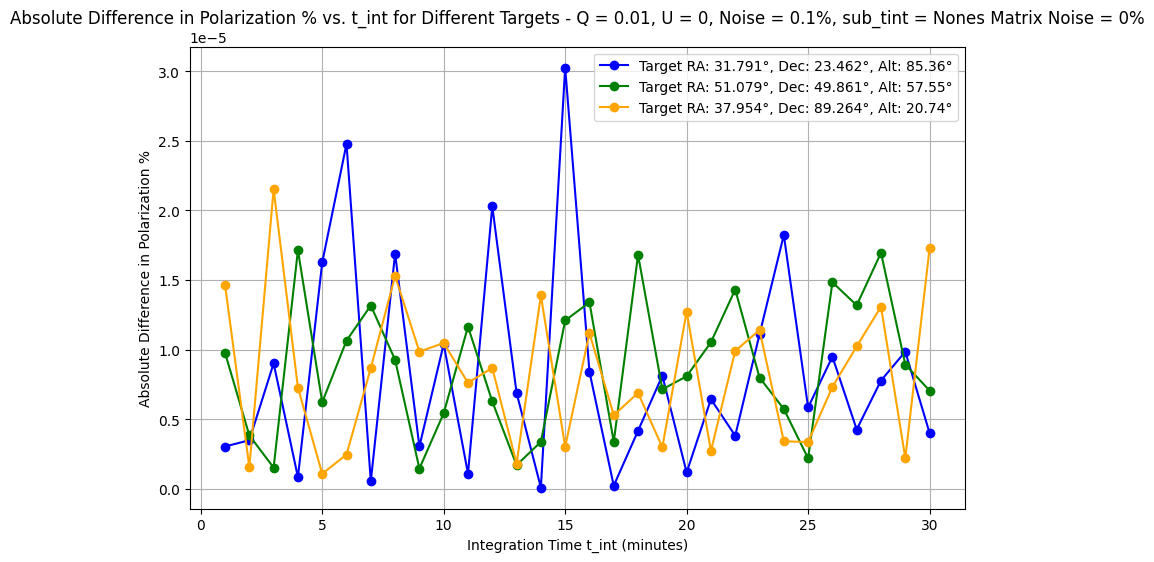

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, '../python/')
import angles
import instrument_mm
import stokes

# Define observer parameters
observer_latitude = 20.0  # Latitude of Mauna Kea in degrees
observer_longitude = -155.5  # Longitude of Mauna Kea in degrees

# Define target parameters
targets = [
    {"ra": 31.791, "dec": 23.462},  # Hamal (Alpha Arietis)
    {"ra": 51.079, "dec": 49.861},  # Mirfak (Alpha Persei)
    {"ra": 37.954, "dec": 89.264},  # Polaris (Alpha Ursae Minoris)
]

# Observation date and time
observation_date = "2460614.91667"  # JD for 10/31/2024
observation_time = "10:00:00"   # UT time to get peak at midnight HST

# Time intervals in seconds (1 to 10 minutes in 1-minute increments)
sub_tint = None # given in seconds
time_intervals = np.arange(1, 31) * 60  # Convert minutes to seconds
Q_injected = 0.01  # Example injected polarization level in Stokes Q
U_injected = 0
noise_percentage = 0.1
TMT_matrix_noise = 0
NFIRAOS_matrix_noise = 0
MODHIS_matrix_noise = 0

# Colors for each target
colors = ['blue', 'green', 'orange']

# Plot data storage
polarization_differences = {i: [] for i in range(len(targets))}

# Run the simulation for each target and each time interval
for target_idx, target in enumerate(targets):
    injected_polarization = np.sqrt(Q_injected**2 + U_injected**2)
    
    for t_int in time_intervals:
        # Run matrix inversion function with dynamic PA and altitude, using sub_tint = 1 second
        S_in_retrieved = instrument_mm.calculate_input_Q_U_observing_sequence_matrix_inversion(
            ra=target["ra"], 
            dec=target["dec"], 
            observer_latitude=observer_latitude, 
            observer_longitude=observer_longitude, 
            jd_str=observation_date, 
            ut_start=observation_time, 
            t_int=t_int, 
            Q=Q_injected, 
            U=U_injected, 
            delta_HWP=0.5,
            noise_percentage=noise_percentage,
            include_V=False,
            sub_tint=sub_tint,  # Sub-integration time in seconds
            TMT_matrix_noise = TMT_matrix_noise,
            NFIRAOS_matrix_noise = NFIRAOS_matrix_noise,
            MODHIS_matrix_noise = MODHIS_matrix_noise
        )
        
        # Calculate retrieved polarization
        Q_retrieved, U_retrieved = S_in_retrieved[1], S_in_retrieved[2]
        retrieved_polarization = np.sqrt(Q_retrieved**2 + U_retrieved**2)
        
        # Absolute difference in polarization percentage
        abs_diff_polarization = np.abs(injected_polarization - retrieved_polarization)
        polarization_differences[target_idx].append(abs_diff_polarization)

# Plotting the results
plt.figure(figsize=(10, 6))
for target_idx, target in enumerate(targets):
    altitude = angles.calculate_altitude(
        phi=observer_latitude, 
        delta=target["dec"], 
        H=angles.calculate_hour_angle(
            ra=target["ra"], 
            observer_longitude=observer_longitude, 
            ut=observation_time, 
            jd_str=observation_date
        )
    )
    plt.plot(time_intervals / 60, polarization_differences[target_idx], '-o', color=colors[target_idx],
             label=f'Target RA: {target["ra"]}°, Dec: {target["dec"]}°, Alt: {altitude:.2f}°')

# Plot settings
plt.xlabel('Integration Time t_int (minutes)')
plt.ylabel('Absolute Difference in Polarization %')
plt.title("Absolute Difference in Polarization % vs. t_int for Different Targets - Q = " \
    + str(Q_injected) + ", U = " + str(U_injected) + ", Noise = " + \
    str(noise_percentage) + str("%") + ", sub_tint = " + str(sub_tint) + "s" + \
    " Matrix Noise = " + str(TMT_matrix_noise) + "%")
plt.legend()
plt.grid(True)
plt.show()


# CASE 3: sub_tint = 1s, meas_noise = 0.1%, matrix_noise = 1%

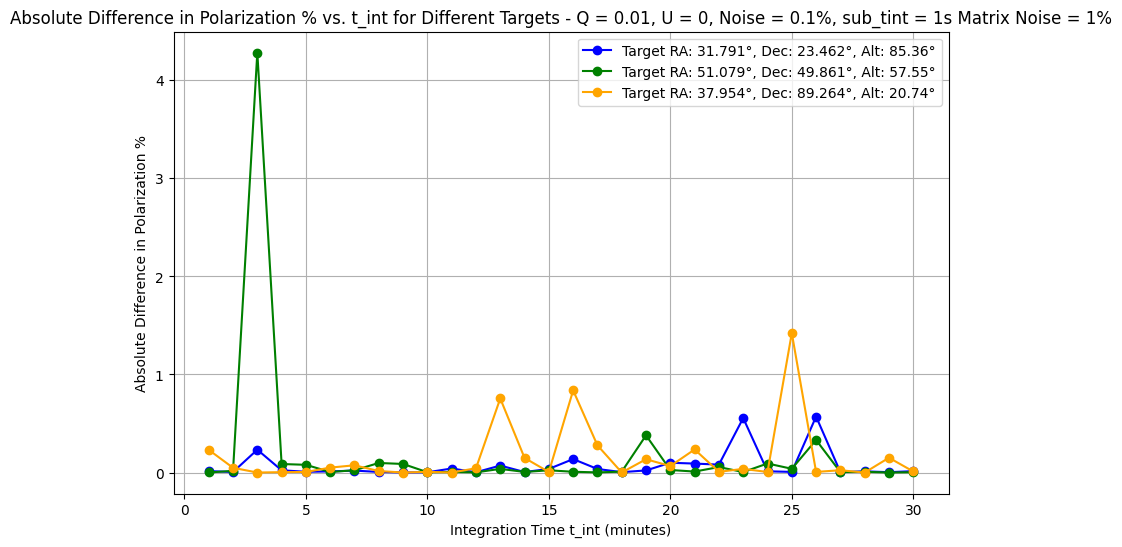

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, '../python/')
import angles
import instrument_mm
import stokes

# Define observer parameters
observer_latitude = 20.0  # Latitude of Mauna Kea in degrees
observer_longitude = -155.5  # Longitude of Mauna Kea in degrees

# Define target parameters
targets = [
    {"ra": 31.791, "dec": 23.462},  # Hamal (Alpha Arietis)
    {"ra": 51.079, "dec": 49.861},  # Mirfak (Alpha Persei)
    {"ra": 37.954, "dec": 89.264},  # Polaris (Alpha Ursae Minoris)
]

# Observation date and time
observation_date = "2460614.91667"  # JD for 10/31/2024
observation_time = "10:00:00"   # UT time to get peak at midnight HST

# Time intervals in seconds (1 to 10 minutes in 1-minute increments)
sub_tint = 1 # given in seconds
time_intervals = np.arange(1, 31) * 60  # Convert minutes to seconds
Q_injected = 0.01  # Example injected polarization level in Stokes Q
U_injected = 0
noise_percentage = 0.1
TMT_matrix_noise = 1
NFIRAOS_matrix_noise = 1
MODHIS_matrix_noise = 1

# Colors for each target
colors = ['blue', 'green', 'orange']

# Plot data storage
polarization_differences = {i: [] for i in range(len(targets))}

# Run the simulation for each target and each time interval
for target_idx, target in enumerate(targets):
    injected_polarization = np.sqrt(Q_injected**2 + U_injected**2)
    
    for t_int in time_intervals:
        # Run matrix inversion function with dynamic PA and altitude, using sub_tint = 1 second
        S_in_retrieved = instrument_mm.calculate_input_Q_U_observing_sequence_matrix_inversion(
            ra=target["ra"], 
            dec=target["dec"], 
            observer_latitude=observer_latitude, 
            observer_longitude=observer_longitude, 
            jd_str=observation_date, 
            ut_start=observation_time, 
            t_int=t_int, 
            Q=Q_injected, 
            U=U_injected, 
            delta_HWP=0.5,
            noise_percentage=noise_percentage,
            include_V=False,
            sub_tint=sub_tint,  # Sub-integration time in seconds
            TMT_matrix_noise = TMT_matrix_noise,
            NFIRAOS_matrix_noise = NFIRAOS_matrix_noise,
            MODHIS_matrix_noise = MODHIS_matrix_noise
        )
        
        # Calculate retrieved polarization
        Q_retrieved, U_retrieved = S_in_retrieved[1], S_in_retrieved[2]
        retrieved_polarization = np.sqrt(Q_retrieved**2 + U_retrieved**2)
        
        # Absolute difference in polarization percentage
        abs_diff_polarization = np.abs(injected_polarization - retrieved_polarization)
        polarization_differences[target_idx].append(abs_diff_polarization)

# Plotting the results
plt.figure(figsize=(10, 6))
for target_idx, target in enumerate(targets):
    altitude = angles.calculate_altitude(
        phi=observer_latitude, 
        delta=target["dec"], 
        H=angles.calculate_hour_angle(
            ra=target["ra"], 
            observer_longitude=observer_longitude, 
            ut=observation_time, 
            jd_str=observation_date
        )
    )
    plt.plot(time_intervals / 60, polarization_differences[target_idx], '-o', color=colors[target_idx],
             label=f'Target RA: {target["ra"]}°, Dec: {target["dec"]}°, Alt: {altitude:.2f}°')

# Plot settings
plt.xlabel('Integration Time t_int (minutes)')
plt.ylabel('Absolute Difference in Polarization %')
plt.title("Absolute Difference in Polarization % vs. t_int for Different Targets - Q = " \
    + str(Q_injected) + ", U = " + str(U_injected) + ", Noise = " + \
    str(noise_percentage) + str("%") + ", sub_tint = " + str(sub_tint) + "s" + \
    " Matrix Noise = " + str(TMT_matrix_noise) + "%")
plt.legend()
plt.grid(True)
plt.show()


# CASE 4: sub_tint = 1s, meas_noise = 0.1%, matrix_noise = 0.1%

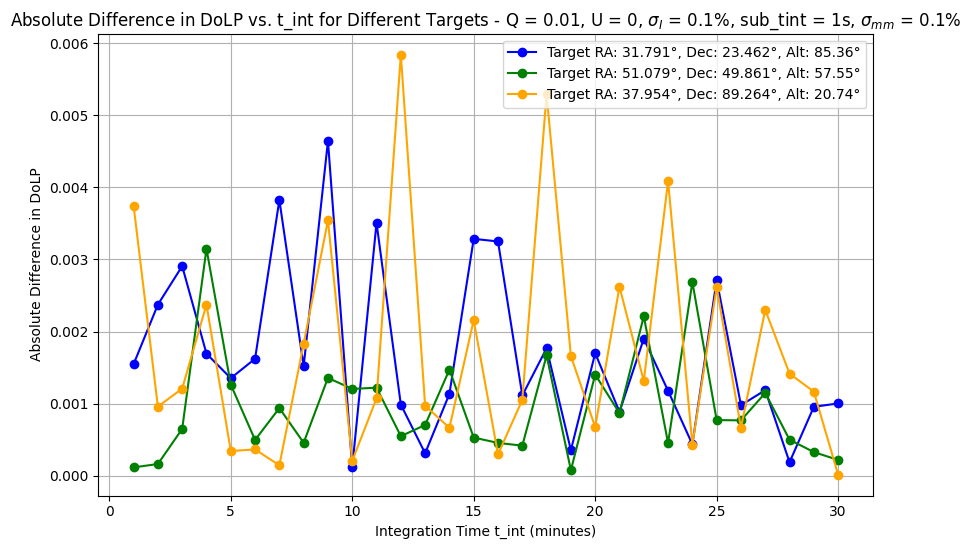

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, '../python/')
import angles
import instrument_mm
import stokes

# Define observer parameters
observer_latitude = 20.0  # Latitude of Mauna Kea in degrees
observer_longitude = -155.5  # Longitude of Mauna Kea in degrees

# Define target parameters
targets = [
    {"ra": 31.791, "dec": 23.462},  # Hamal (Alpha Arietis)
    {"ra": 51.079, "dec": 49.861},  # Mirfak (Alpha Persei)
    {"ra": 37.954, "dec": 89.264},  # Polaris (Alpha Ursae Minoris)
]

# Observation date and time
observation_date = "2460614.91667"  # JD for 10/31/2024
observation_time = "10:00:00"   # UT time to get peak at midnight HST

# Time intervals in seconds (1 to 10 minutes in 1-minute increments)
sub_tint = 1 # given in seconds
time_intervals = np.arange(1, 31) * 60  # Convert minutes to seconds
Q_injected = 0.01  # Example injected polarization level in Stokes Q
U_injected = 0
noise_percentage = 0.1
TMT_matrix_noise = 0.1
NFIRAOS_matrix_noise = 0.1
MODHIS_matrix_noise = 0.1

# Colors for each target
colors = ['blue', 'green', 'orange']

# Plot data storage
polarization_differences = {i: [] for i in range(len(targets))}

# Run the simulation for each target and each time interval
for target_idx, target in enumerate(targets):
    injected_polarization = np.sqrt(Q_injected**2 + U_injected**2)
    
    for t_int in time_intervals:
        # Run matrix inversion function with dynamic PA and altitude, using sub_tint = 1 second
        S_in_retrieved = instrument_mm.calculate_input_Q_U_observing_sequence_matrix_inversion(
            ra=target["ra"], 
            dec=target["dec"], 
            observer_latitude=observer_latitude, 
            observer_longitude=observer_longitude, 
            jd_str=observation_date, 
            ut_start=observation_time, 
            t_int=t_int, 
            Q=Q_injected, 
            U=U_injected, 
            delta_HWP=0.5,
            noise_percentage=noise_percentage,
            include_V=False,
            sub_tint=sub_tint,  # Sub-integration time in seconds
            TMT_matrix_noise = TMT_matrix_noise,
            NFIRAOS_matrix_noise = NFIRAOS_matrix_noise,
            MODHIS_matrix_noise = MODHIS_matrix_noise
        )
        
        # Calculate retrieved polarization
        Q_retrieved, U_retrieved = S_in_retrieved[1], S_in_retrieved[2]
        retrieved_polarization = np.sqrt(Q_retrieved**2 + U_retrieved**2)
        
        # Absolute difference in polarization percentage
        abs_diff_polarization = np.abs(injected_polarization - retrieved_polarization)
        polarization_differences[target_idx].append(abs_diff_polarization)

# Plotting the results
plt.figure(figsize=(10, 6))
for target_idx, target in enumerate(targets):
    altitude = angles.calculate_altitude(
        phi=observer_latitude, 
        delta=target["dec"], 
        H=angles.calculate_hour_angle(
            ra=target["ra"], 
            observer_longitude=observer_longitude, 
            ut=observation_time, 
            jd_str=observation_date
        )
    )
    plt.plot(time_intervals / 60, polarization_differences[target_idx], '-o', color=colors[target_idx],
             label=f'Target RA: {target["ra"]}°, Dec: {target["dec"]}°, Alt: {altitude:.2f}°')

# Plot settings
plt.xlabel('Integration Time t_int (minutes)')
plt.ylabel('Absolute Difference in DoLP')
plt.title("Absolute Difference in DoLP vs. t_int for Different Targets - Q = " \
    + str(Q_injected) + ", U = " + str(U_injected) + ", $\sigma_I$ = " + \
    str(noise_percentage) + "%" + ", sub_tint = " + str(sub_tint) + "s" + \
    ", $\sigma_{mm}$ = " + str(TMT_matrix_noise) + "%")

plt.legend()
plt.grid(True)
plt.show()
